In [1]:
# 계층적 군집화

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                         # Matplotlib의 pyplot모듈을 plt로 불러옴. 데이터 시각화를 위한 라이브러리로, 플롯과 그래프를 그리는 데 사용됨.
from sklearn.preprocessing import StandardScaler        # 데이터를 평균이 0이고 분산이 1인 표준정규분포로 변환하는데 사용 
from sklearn.cluster import AgglomerativeClustering     # AgglomerativeClustering 클래스를 불러옴. 이 클래스는 계층적 군집화를 수행하는 데 사용됨.
import scipy.cluster.hierarchy as sch                   # SciPy 라이브러리에서 계층적 군집화에 필요한 함수를 불러옴. sch는 덴드로그램을 그리거나 계층적 군집화를 수행하는데 사용.

# 데이터셋 불러오기
df = pd.read_csv('Mall_Customers.csv')


# 데이터 확인
print(df.head())

# 필요한 열만 선택
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


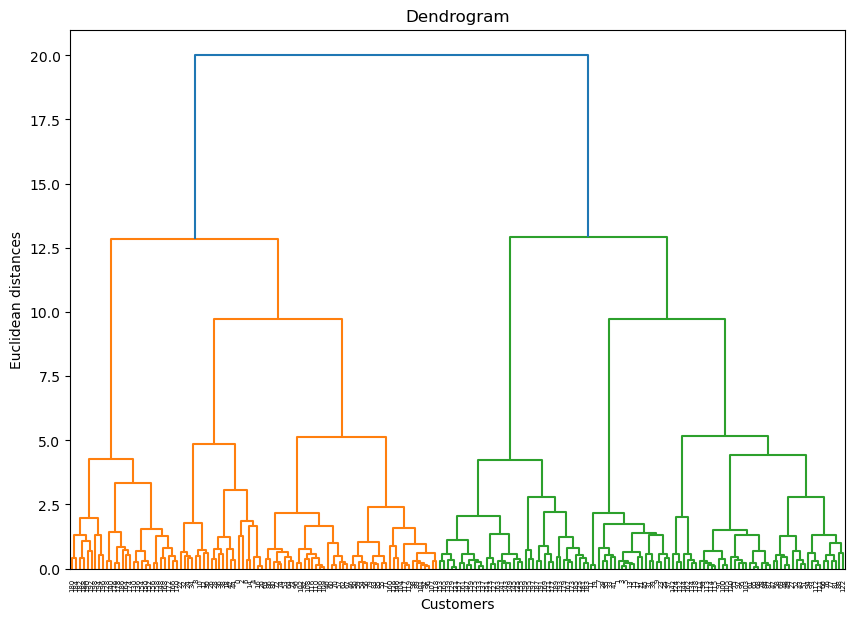

In [3]:
# 덴드로그램 생성 (분할 군집화)
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
# 'ward'방법은 클러스터 내의 분산을 최소화하는 방식으로 데이터를 군집화합니다. 이 방법은 군집화 성능이 높은편이다.
# sch.dendrogram() 은 계층적 군집화 결과를 덴드로그램형태로 시각화하는 함수.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

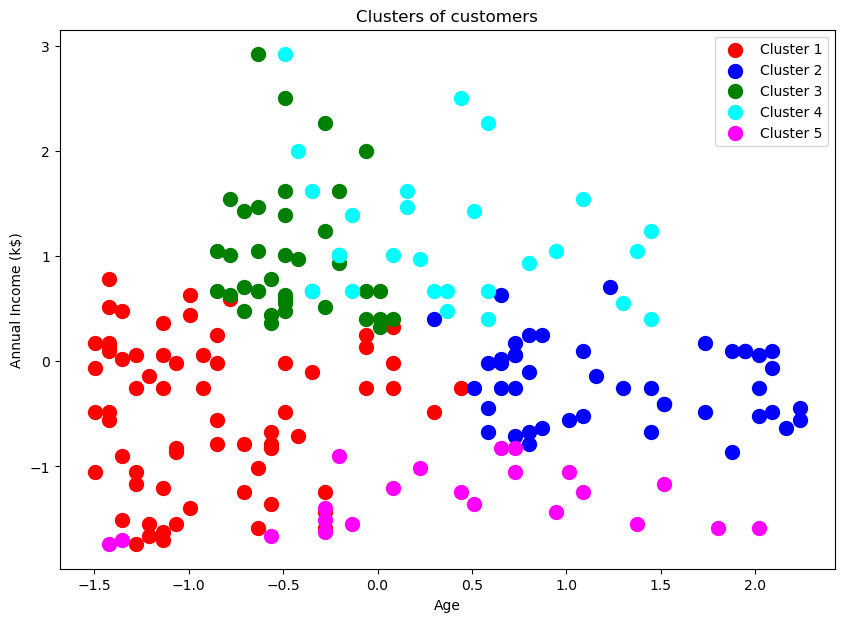

In [5]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
                              # 군집의 개수     군집을 나누는 기준       ward 방법을 사용하여 군집 간 거리를 측정하고 데이터를 합친다.
# 모델 학습 및 예측
y_hc = hc.fit_predict(X_scaled)  # fit_predict 는 데이터를 학습하고 각 데이터가 속할 군집을 예측함.

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')  # s = 100 점의 크기를 100으로 설정한것, c 는 군집의 색깔.
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_hc == 3, 0], X_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_hc == 4, 0], X_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39002826186267214
